In [ ]:
!nvidia-smi

Sat Mar 16 13:44:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## **Installing YOLOv8**

In [ ]:
pip show jax

Name: jax
Version: 0.4.25
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ml-dtypes, numpy, opt-einsum, scipy
Required-by: chex, dopamine-rl, flax, optax, orbax-checkpoint


In [ ]:
pip install jax

In [ ]:
pip install --upgrade jax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: jax
    Found existing installation: jax 0.4.23
    Uninstalling jax-0.4.23:
      Successfully uninstalled jax-0.4.23


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## Inference with Pre-trained COCO Model

### 💻 CLI

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 102.0ms
Speed: 3.7ms preprocess, 102.0ms inference, 520.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


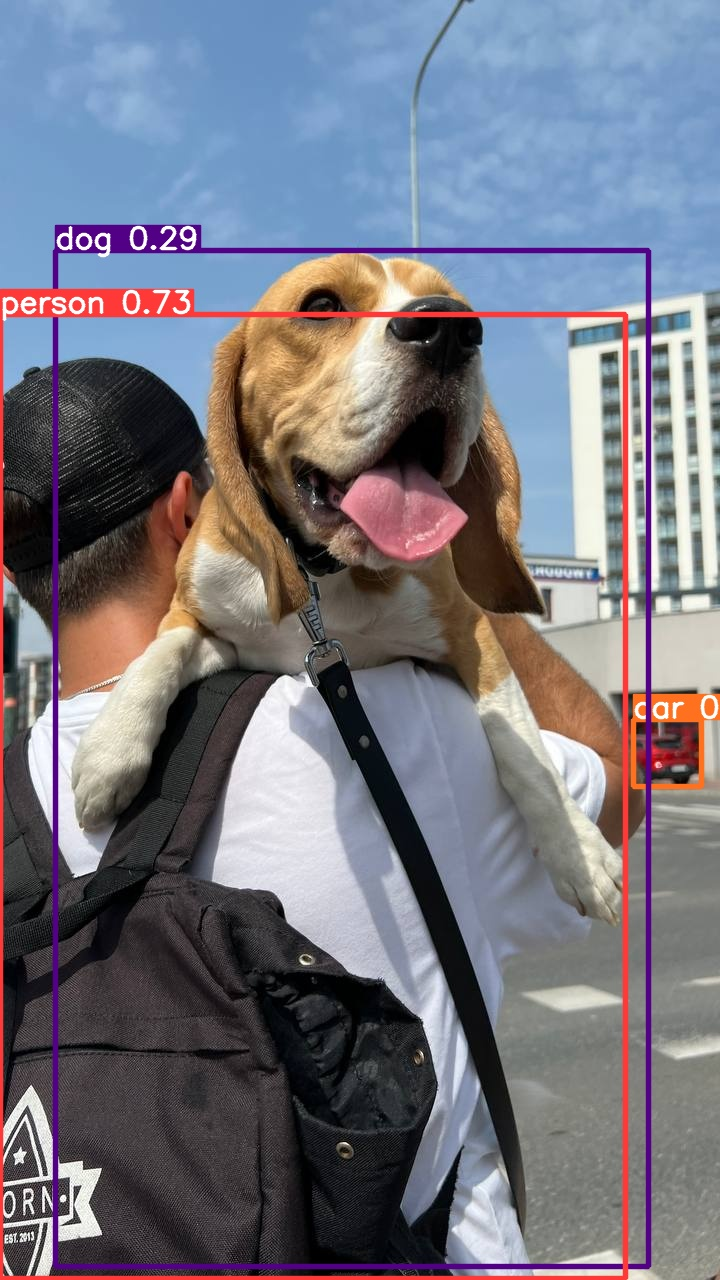

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 104.1ms
Speed: 3.6ms preprocess, 104.1ms inference, 504.2ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EoCBqpSnuQABu4RjAoD5")
project = rf.workspace("fire-dataset-wtnhb").project("fire-detection-n4dzj")
dataset = project.version(1).download("yolov8")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Fire-Detection-1 in yolov8:: 100%|██████████| 7189/7189 [00:01<00:00, 4920.15it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=35 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 124MB/s]
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Fire-Detection-1/data.yaml, epochs=35, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream

In [ ]:
!ls {HOME}/runs/detect/train/

ls: cannot access '{HOME}/runs/detect/train/': No such file or directory


/content


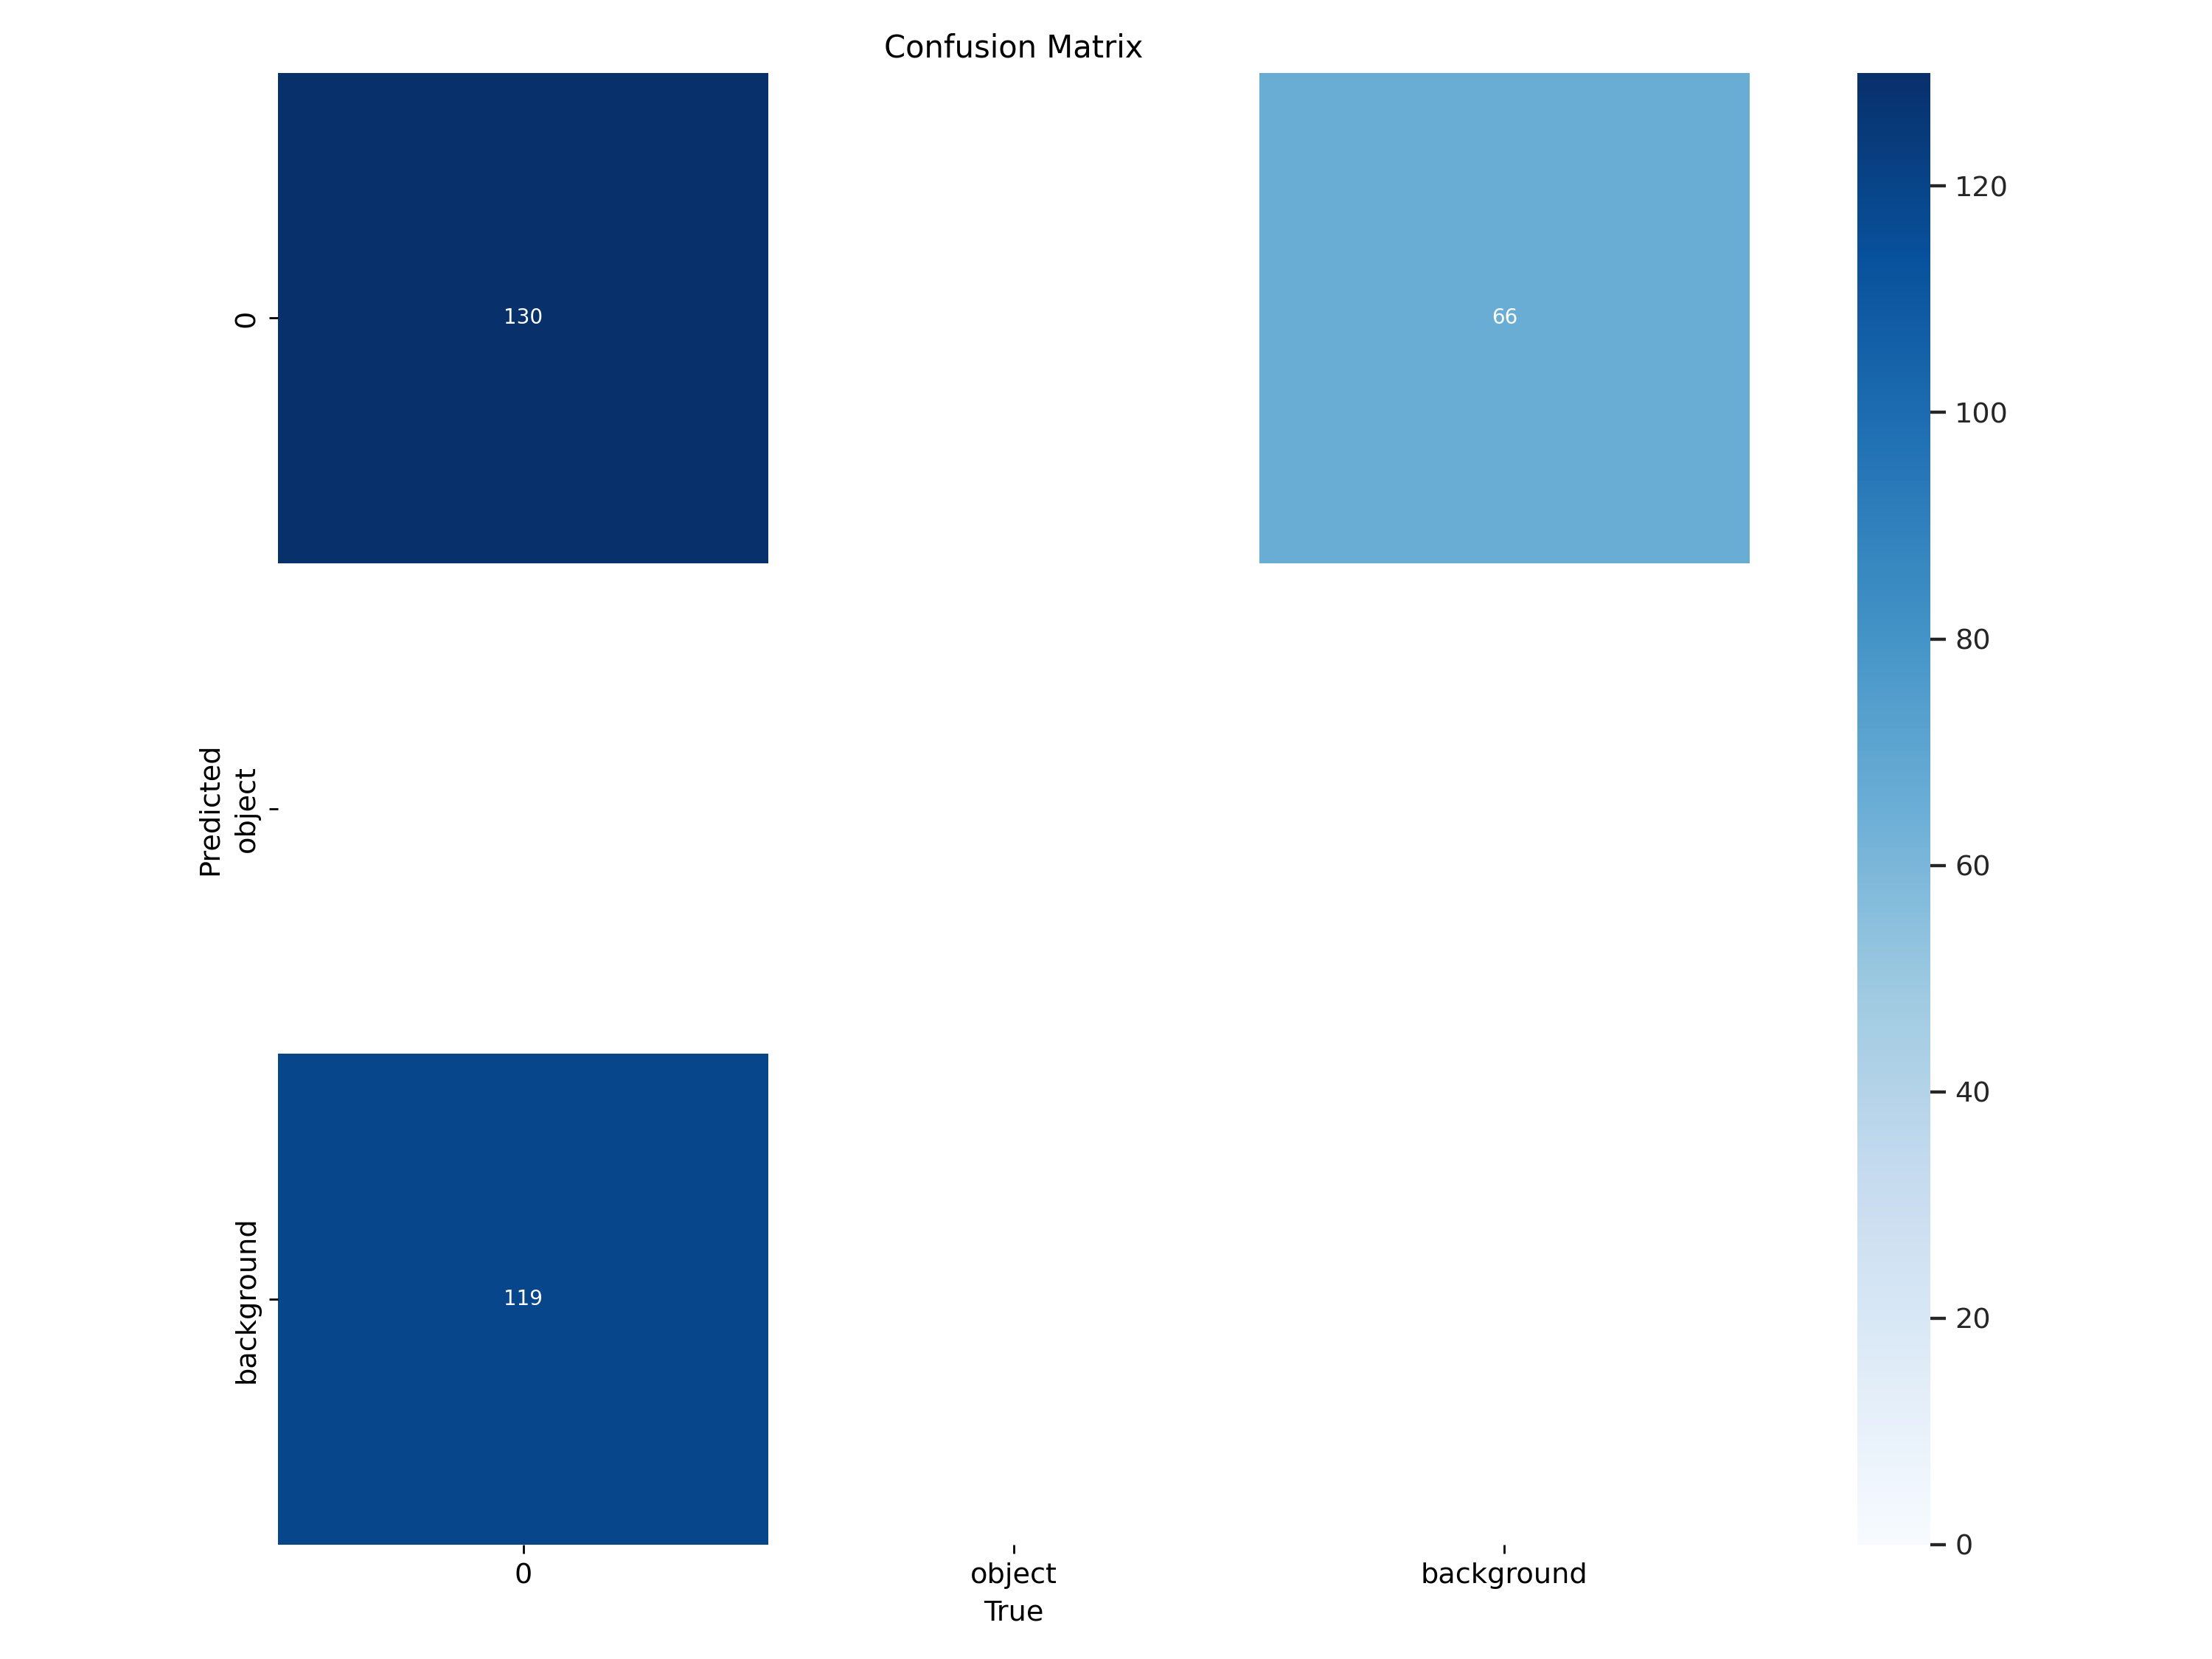

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


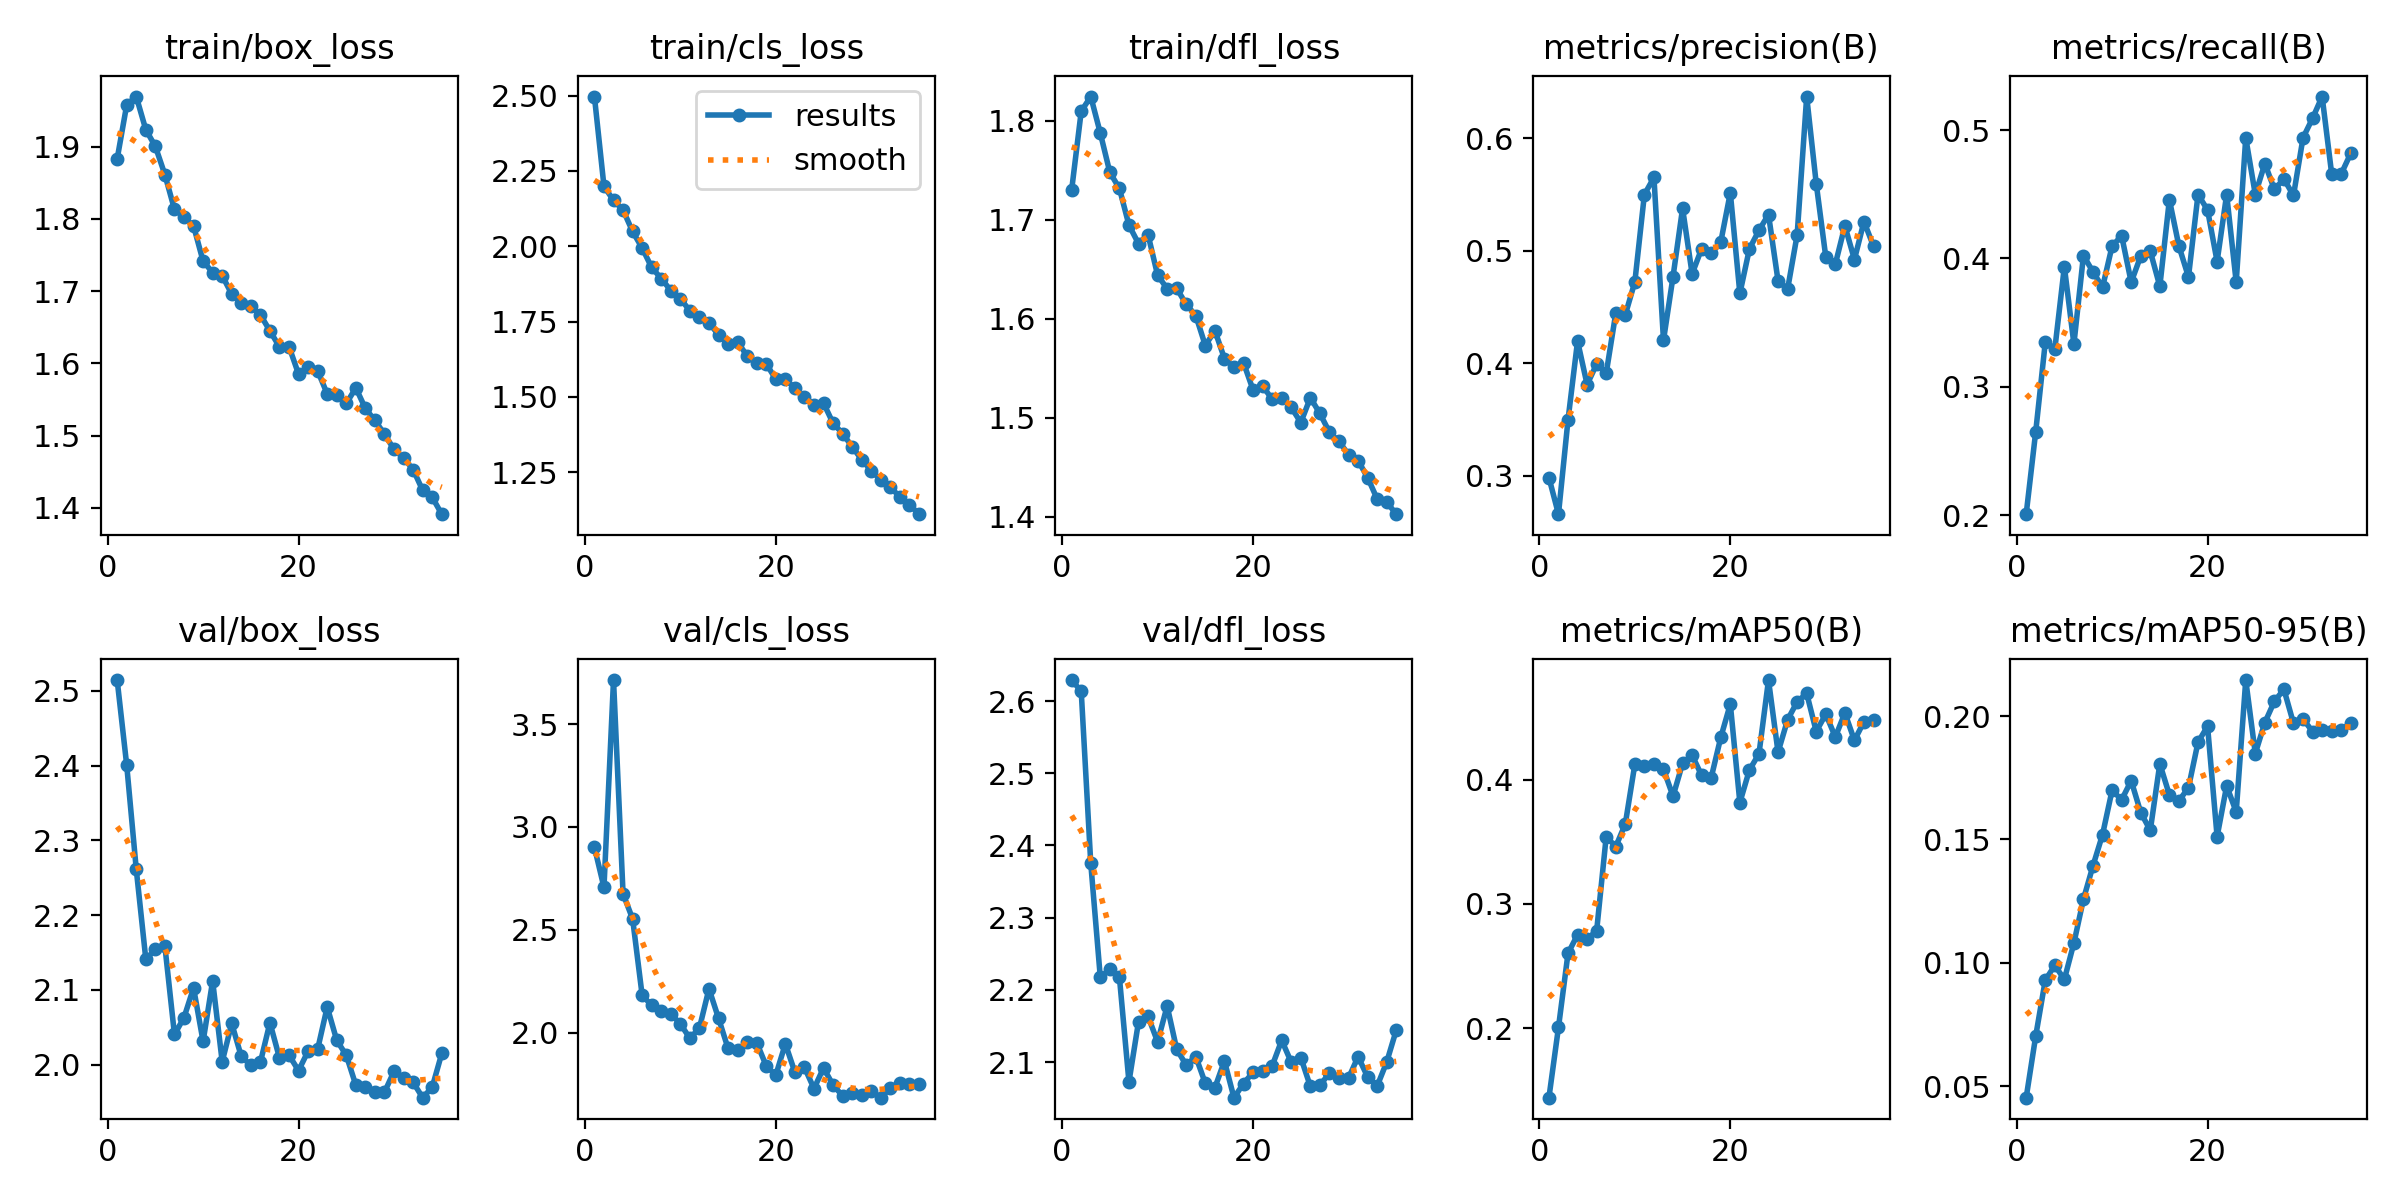

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


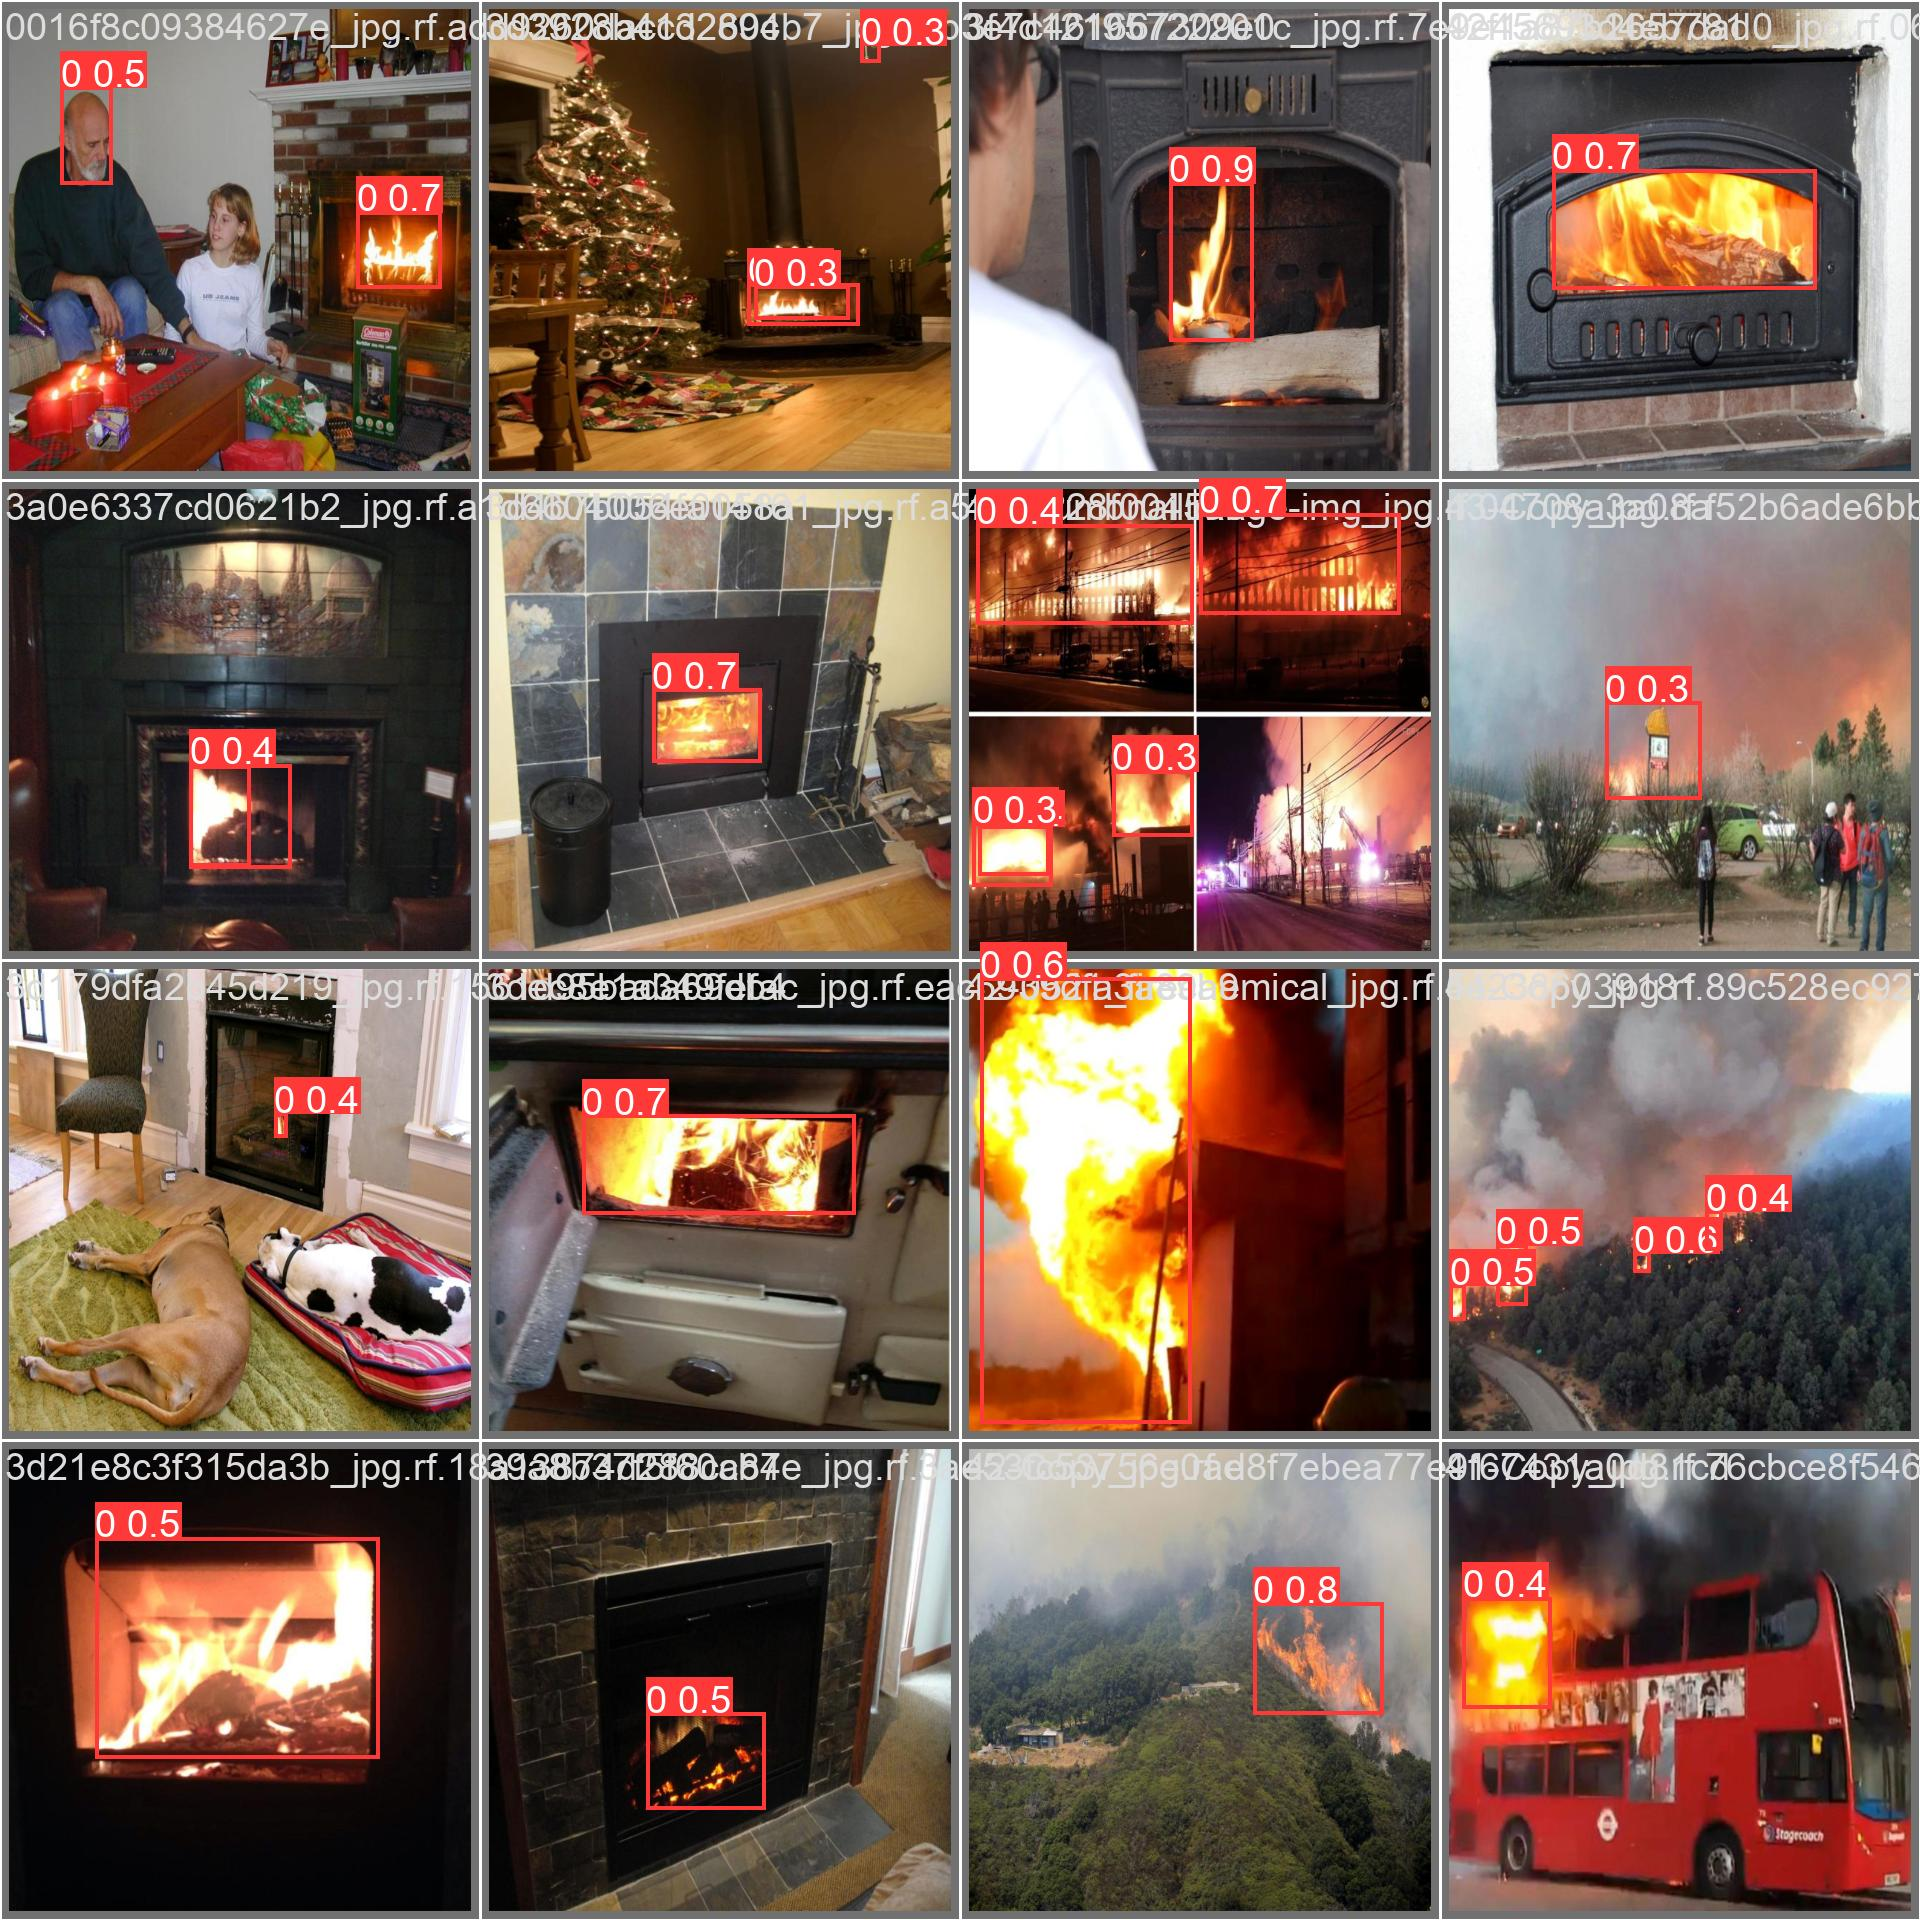

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Fire-Detection-1/valid/labels.cache... 149 images, 0 backgrounds, 0 corrupt: 100% 149/149 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:06<00:00,  1.65it/s]
                   all        149        249       0.55      0.494      0.486      0.214
                     0        149        249       0.55      0.494      0.486      0.214
Speed: 3.8ms preprocess, 15.5ms inference, 0.0ms loss, 8.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=0

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 445, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 242, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 205, in predict_cli
    for _ in gen:  # running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = gen.send(

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True

[Errno 2] No such file or directory: '{HOME}'
/content
/bin/bash: line 1: yolo: command not found


**NOTE:** Let's take a look at few results.

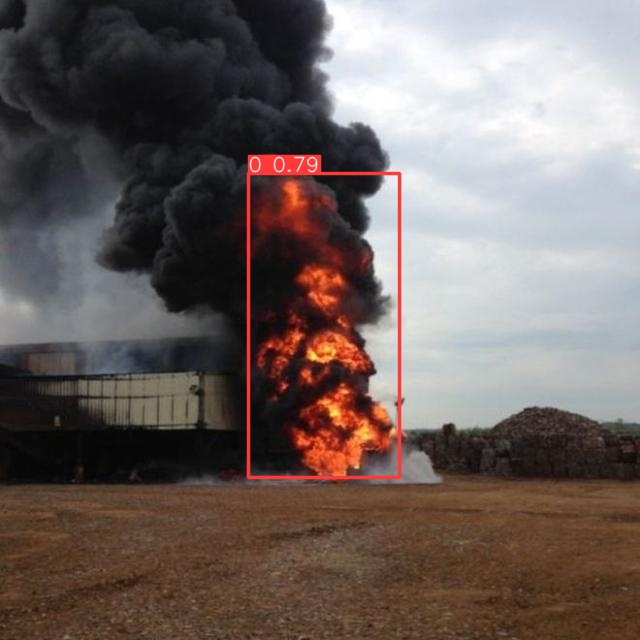

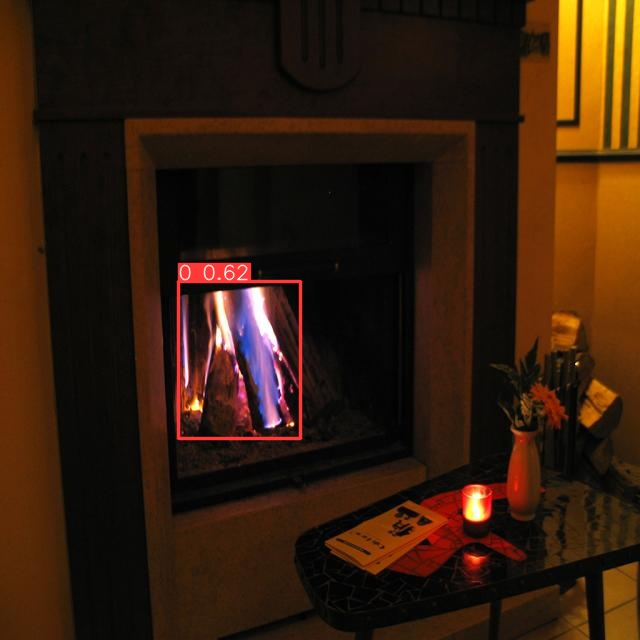

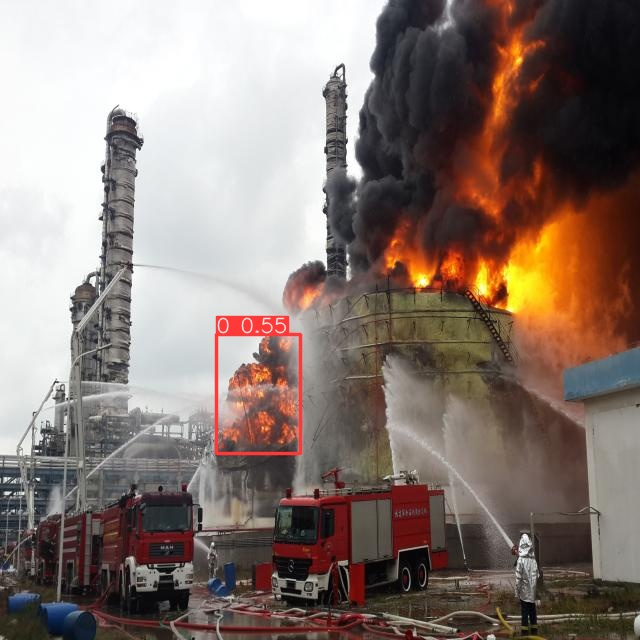

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!zip -r /content/file.zip /content

Streaming output truncated to the last 5000 lines.
  adding: content/datasets/Fire-Detection-1/train/labels/new_fire_fire-332_png.rf.4e50d96a79763dd17757616238a5b6e2.txt (deflated 31%)
  adding: content/datasets/Fire-Detection-1/train/labels/WEBFire310_jpg.rf.4521f618349fb6295e73db4a5e76181f.txt (deflated 52%)
  adding: content/datasets/Fire-Detection-1/train/labels/MirrorWEBFire1083_jpg.rf.c97fe0866da84d6861c73b15443238a8.txt (deflated 30%)
  adding: content/datasets/Fire-Detection-1/train/labels/1004_jpg.rf.79b0e75503255ec8266a14b251164642.txt (deflated 17%)
  adding: content/datasets/Fire-Detection-1/train/labels/WEBFire987_jpg.rf.57d5c3f37cf008fb7db0e13e14e7b53a.txt (deflated 49%)
  adding: content/datasets/Fire-Detection-1/train/labels/WEBSmoke1293_jpg.rf.d03366bf3c2e9314af41fd5fed0eede3.txt (deflated 34%)
  adding: content/datasets/Fire-Detection-1/train/labels/MirrorWEBFire1152_jpg.rf.b85c5f06a597bb40f0c45b15c1c40a8d.txt (deflated 57%)
  adding: content/datasets/Fire-Detection-1

In [ ]:
%cd {HOME}

import pandas as pd


results_df = pd.read_csv('runs/detect/train/results.csv')
results_df


/content


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.8832,2.4969,1.7302,0.29832,0.20080,0.14394,0.04528,2.5143,2.9016,2.6292,0.000553,0.000553,0.000553
1,2,1.9580,2.1990,1.8094,0.26574,0.26506,0.20052,0.07028,2.4003,2.7068,2.6137,0.001077,0.001077,0.001077
2,3,1.9695,2.1522,1.8243,0.34960,0.33460,0.26013,0.09292,2.2611,3.7135,2.3752,0.001570,0.001570,0.001570
3,4,1.9236,2.1199,1.7874,0.41967,0.32932,0.27518,0.09890,2.1409,2.6752,2.2171,0.001525,0.001525,0.001525
4,5,1.9005,2.0490,1.7477,0.38092,0.39357,0.27171,0.09323,2.1540,2.5537,2.2288,0.001525,0.001525,0.001525
5,6,1.8613,1.9939,1.7316,0.39929,0.33333,0.27835,0.10798,2.1582,2.1824,2.2174,0.001478,0.001478,0.001478
6,7,1.8133,1.9294,1.6945,0.39100,0.40225,0.35420,0.12575,2.0402,2.1338,2.0725,0.001431,0.001431,0.001431
7,8,1.8027,1.8927,1.6759,0.44430,0.38956,0.34608,0.13933,2.0628,2.1064,2.1557,0.001384,0.001384,0.001384
8,9,1.7905,1.8529,1.6849,0.44300,0.37751,0.36437,0.15194,2.1026,2.0934,2.1633,0.001337,0.001337,0.001337
9,10,1.7416,1.8254,1.6440,0.47226,0.40964,0.41239,0.16992,2.0309,2.0437,2.1279,0.001290,0.001290,0.001290
